<a href="https://www.kaggle.com/code/guirodrigues16/eda-explanation-simple-data-visualization?scriptVersionId=139021891" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Notes
Just a simple project where I'll show how i work during the process of Data Visualization. I'll explain each code trying to make in the easiest way that i can. I won't use any Machine learning algorithm, just simple algorithms with the purpose of making the visualization of the data easier.

# Importing packages

In [1]:
import pandas as pd # package of dataframes
import numpy as np # package of arrays and other things
import matplotlib.pyplot as plt # package of graphs 
import seaborn as sns # other graphs package

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Reading and treating the data

In [2]:
Avocado_df = pd.read_csv('/kaggle/input/avocado-prices/avocado.csv') # reading the data to a dataframe
Avocado_df .head() # Seeing the fisrts 5 rows of the data frame

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
Avocado_df.info() # Getting some info about the df columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


### Obs
Normally i would change some columns names to make my job easier, but this names are actually pretty good.

In [4]:
# turning the date column in a actually datetime column to pandas
Avocado_df["Date"] = pd.to_datetime(Avocado_df["Date"])

# Starting the data visualization

I want to see the distribution of the Avarage price. To do this I'm going to use hitograms and kernel density estimate (KDE) plots.

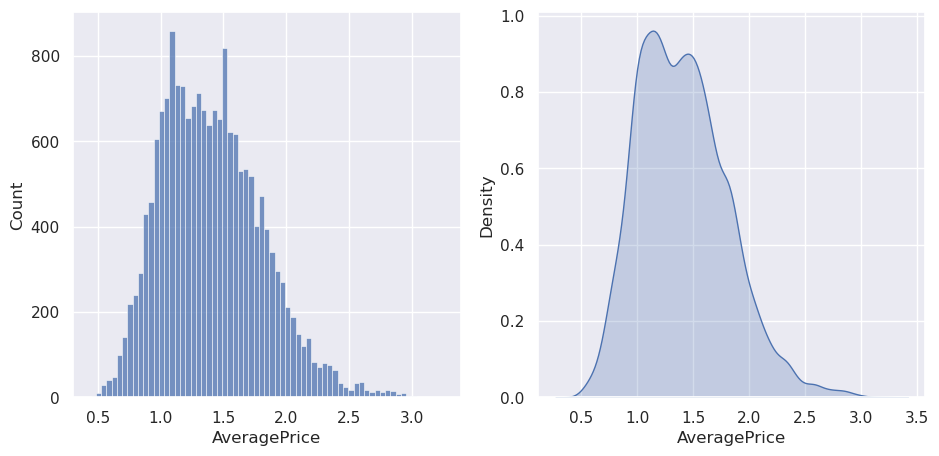

In [5]:
sns.set_theme()

fig,x = plt.subplots(1, 2, figsize=(11,5)) # creating the fig that will contain both graphs side by side
sns.histplot(Avocado_df['AveragePrice'],  ax=x[0]) # Histogram 
sns.kdeplot(Avocado_df['AveragePrice'],  ax=x[1], fill=True);# KDE

With the hist plot and the kernel density estimate we can see the total amount of things of some range. This can be used to calculate the probability of something to happen based on some big data base or can be used as a simple graph made to visualize the data and find the count of times that something happend.
Here we can see that the probability of findind prices of avocado between 1.0 and 1.70 are higher. We can see that it's pretty hard to find prices in the range of 0.5 to 0.8 and 2.2 to 3.0. And the most comum price is close to 1.1 dollars.

#### little note
Now i want to explore a little to see if I find something intersting. I will see the total number of different regions and the diferent types of avocado. 

In [6]:
# Using the functin unique() I can find the differents values that exist in that column, and using the len I count
# the size of that array/list

print('Total number of regions:', len(Avocado_df["region"].unique()))
print('Total number of types:', len(Avocado_df["type"].unique()))
print('Types:', Avocado_df["type"].unique())

Total number of regions: 54
Total number of types: 2
Types: ['conventional' 'organic']


#### little note
Now i'm going to make some graphs to see the proporcion between both types to see if we have the same ammount types

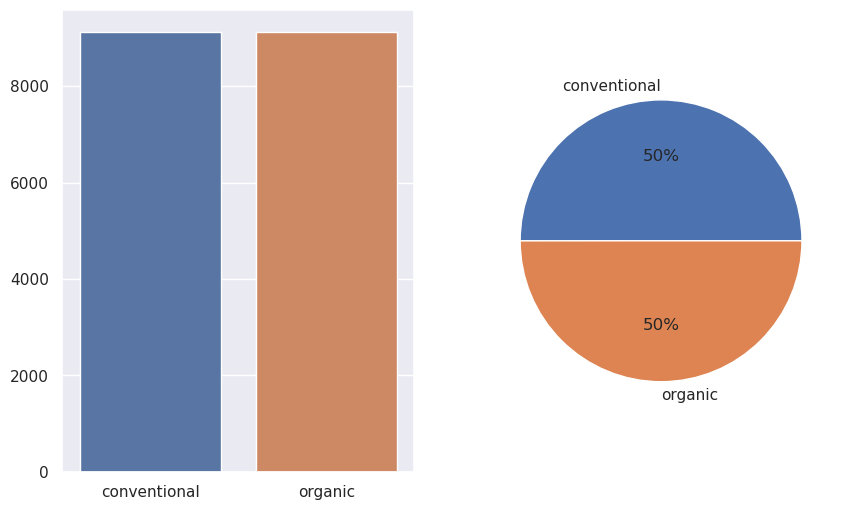

In [7]:
# The funtion value_counts() count the total number of some value that you want (in this case conventional and
# organic) in a array.

x = Avocado_df['type'].unique()
y = [Avocado_df['type'].value_counts()['conventional'], Avocado_df['type'].value_counts()['organic']]


fig, ax = plt.subplots(1, 2, figsize=(10,6)) # creating the fig to display both graphs
sns.barplot(x=x, y=y, ax= ax[0]) # creating a bar plot.
plt.pie(x=y, autopct='%.0f%%', labels=x); # creating a pie plot

Bar graphs and pie graphs are good to visualize and compare the total ammount of anything. It's not used so much to find patterns and correlations(but it can be used). It's a way to see how the values are distributed, but it's used when we don't have so much categories. This because it makes the visualization too hard or even impossible. 
Here we can see that the type of avocado have the same distribution.

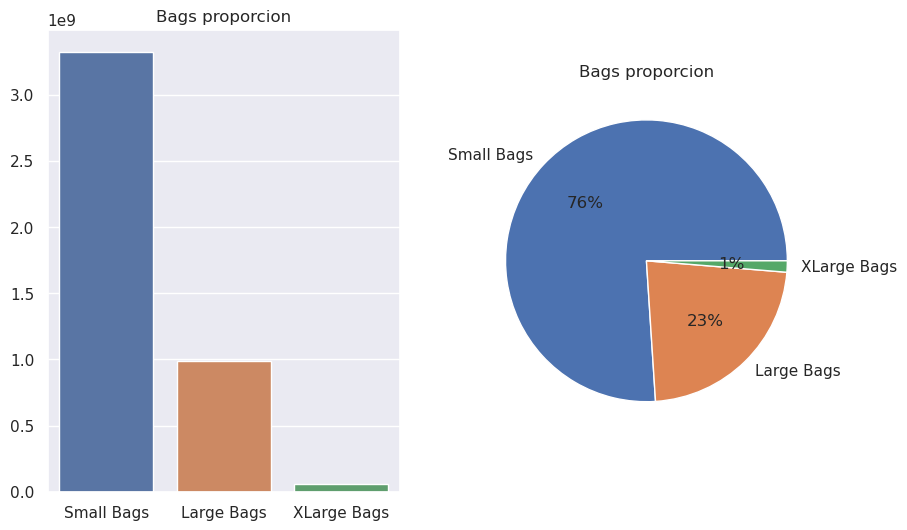

In [8]:
# using the sum() function got the total number of each bag. Then use this values to creat a list(y)
# then i created the x list with the names of each bag

y = [Avocado_df['Small Bags'].sum(), Avocado_df['Large Bags'].sum(), Avocado_df['XLarge Bags'].sum()]
x = ['Small Bags', 'Large Bags', 'XLarge Bags']
fig, ax = plt.subplots(1, 2, figsize=(10,6)) # creating the fig where i'll display both graphs
sns.barplot(x=x, y=y, ax= ax[0]).set(title='Bags proporcion') # creating a barplot and setting a title
plt.pie(x=y, autopct='%.0f%%', labels= x) # creating a pie plot
plt.title('Bags proporcion'); # stting a title to the pie plot
     

Bar graphs and pie graphs are good to visualize and compare the total ammount of anything. It's not used so much to find patterns and correlations(but it can be used). It's a way to see how the values are distributed, but it's used when we don't have so much categories. This because it makes the visualization too hard or even impossible. 
Here we can see that small bags are more buyed or used than large bags and Xlarge bags. We can use the bar graph to have an idea of the ral number of bags being selled and the pie to compare each one.

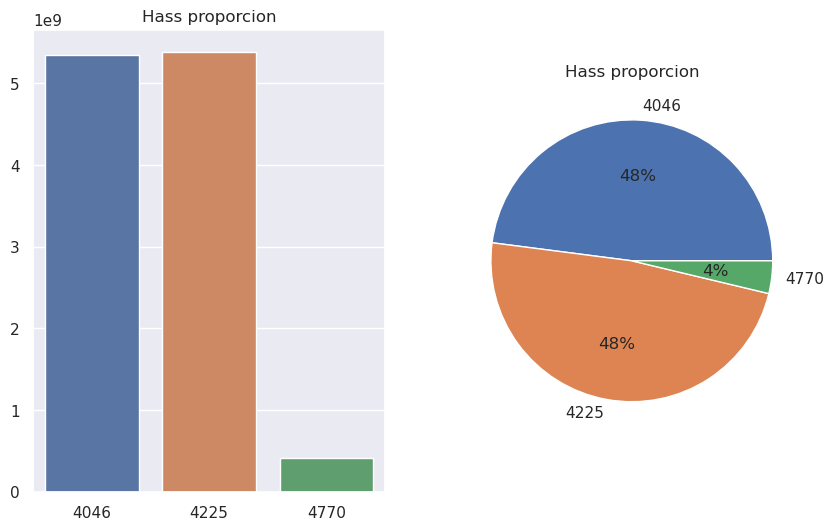

In [9]:
# The code of this cell is the same as the posterior with different columns.

# Creating the list of y's. List that has the sum of each hass type of avocado.
y = [Avocado_df['4046'].sum(), Avocado_df['4225'].sum(), Avocado_df['4770'].sum()]

# List with each hass of avocado
x = ['4046', '4225', '4770']


fig, ax = plt.subplots(1, 2, figsize=(10,6)) # creating the fig where i'll display both plots

sns.barplot(x=x, y=y, ax= ax[0]).set(title='Hass proporcion') # Creating and setting the title of the
                                                              # barplot

plt.pie(x=y, autopct='%.0f%%', labels = x) # crating the pie plot
plt.title('Hass proporcion'); # setting the pieplot title

Bar graphs and pie graphs are good to visualize and compare the total ammount of anything. It's not used so much to find patterns and correlations(but it can be used). It's a way to see how the values are distributed, but it's used when we don't have so much categories. This because it makes the visualization too hard or even impossible. 
Here we can see that we have almost the same number of 4046 and 4225 hass type. And the 4770 is less buyed than the others. 

# Searching intersting features
In this segment I'll use my ideas to find some patterns and some intersting features as:
### Ideas to explore
* see if there is some correlation between the avarege price to the total volume
* find the countrys with the highest and lowest avarage prices
* compare the avarage prices of each year

Text(0.5, 1.0, 'Line Graph')

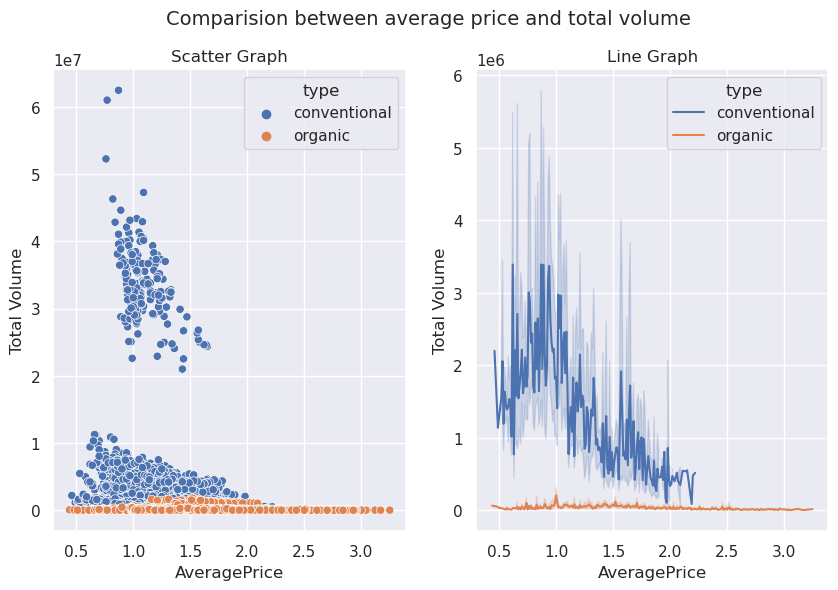

In [10]:
# Finding some realtion between total volume and price

fig, ax = plt.subplots(1, 2, figsize=(10,6))  # creating the fig whre i'll display both graphs

# setting the fig title (not the title of one graph but the "overall title")
fig.suptitle('Comparision between average price and total volume', fontsize=14)

#Just building the scatterplot("dot's graph")
sns.scatterplot( x=Avocado_df['AveragePrice'], 
                y=Avocado_df['Total Volume'],
                hue=Avocado_df['type'], 
                ax = ax[0])

# Creating the lineplot
sns.lineplot(data=Avocado_df, x='AveragePrice', y = 'Total Volume', hue='type', ax = ax[1])

# setting title of each individual plot
ax[0].set_title('Scatter Graph')
ax[1].set_title('Line Graph')


We normally use line and scatter plots to see the ralation between two values. It's used to find patterns and to see some distibution. Analysing the scatter plot i can tell that conventional avocado has a pick of volume between 1.0 and 1.7 dollars and the organic has a pick between 1.5 and 2.1. Here We can see that the volume it´s not proporcional or inversely proportional to the avarage price. One intersting think is that there is a big gap between 1x10^7 and 2x10^7 of total volume, we could search more to find why this happened.

Text(0.5, 1.0, 'Highest Prices')

<Figure size 1000x600 with 0 Axes>

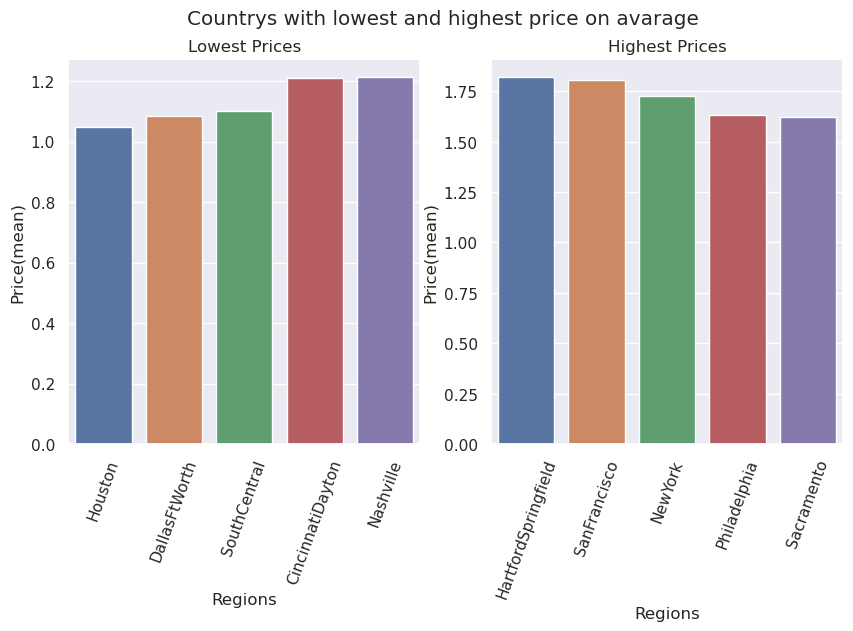

In [11]:
# seeing the highest and lowest countrys price
plt.figure(figsize=(10,6)) # creating the fig that will countain both graphs
regions = Avocado_df['region'].unique() # Creating the list with all regions 
average_price_mean = [] # list of avarage price of each region

for i in regions:  # Code used to insert the mean price of each region into the list
    filtro = Avocado_df['region'] == i
    average_price_mean.append((Avocado_df[filtro]['AveragePrice']).mean())
    
# creating the dataframe using both lists
Price_per_region = pd.DataFrame({
    'Regions': regions,
    'Price(mean)': average_price_mean
}).sort_values('Price(mean)')

# creating both barplots
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.barplot(x = Price_per_region['Regions'][0:5],
            y=Price_per_region['Price(mean)'][0:5],
            ax = ax[0])
sns.barplot(x = Price_per_region['Regions'][49:54][::-1],
            y=Price_per_region['Price(mean)'][49:54][::-1],
            ax = ax[1])
fig.suptitle('Countrys with lowest and highest price on avarage')

ax[0].tick_params(axis='x', labelrotation=70)# setting the rotation of x label(regions)
ax[0].set_title('Lowest Prices') # setting title
ax[1].tick_params(axis='x', labelrotation=70)
ax[1].set_title('Highest Prices')

This is a simple graph that show us about the regions with highest and lowers avarage prices. I used bar graph to compare the values in a easy way. Using this data we could study and try to understand why there is that difference between prices of each region.

Text(0.5, 1.0, 'Avarage price of each year')

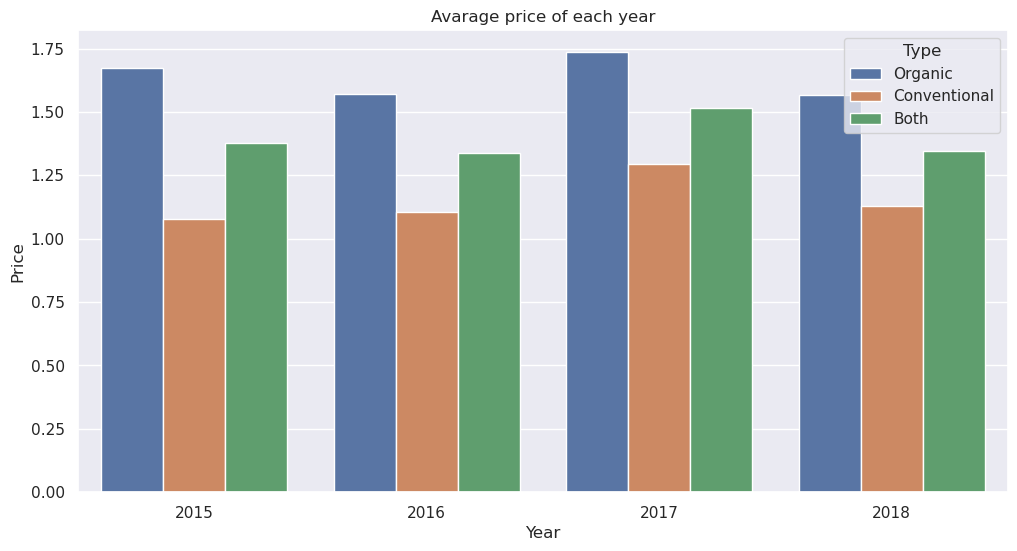

In [12]:
# Creating the dictionary that we will use to create a dataframe later
Average_price_by_year = {'Type':[], 'Price':[], 'Year':[]}
                        
years = [2015, 2016, 2017, 2018]
types = ['Organic', 'Conventional', 'Both']

for year in years:
    for typ in types:
        Average_price_by_year['Year'].append(year)
        Average_price_by_year['Type'].append(typ)
            
    # filter used to get only info about organic avocado from the year
    Filter_organic = (
        (Avocado_df['Date'] >= str(year)) & (Avocado_df['Date'] < str(year+1)) &  (Avocado_df['type'] == 'organic')
    )
    
    # filter used to get only info about conventional avocado from the year
    Filter_conventional = (
        (Avocado_df['Date'] >= str(year)) & (Avocado_df['Date'] < str(year+1)) &  (Avocado_df['type'] == 'conventional')
    )
    
    # getting the mean of each type of avocado and the total avarage
    
    
    Organic_mean = (Avocado_df[Filter_organic]['AveragePrice']).mean()
    Conventional_mean = (Avocado_df[Filter_conventional]['AveragePrice']).mean()
    Total_mean = (Organic_mean + Conventional_mean) / 2
    
    # Putting the information in the dictionary
    Average_price_by_year['Price'].append(Organic_mean)
    Average_price_by_year['Price'].append(Conventional_mean)
    Average_price_by_year['Price'].append(Total_mean)
    
    # increasing one to the year
    year += 1

# creating the dataframe
plt.figure(figsize=(12,6))
Average_price_by_year = pd.DataFrame(Average_price_by_year)
sns.barplot(data=Average_price_by_year, x="Year", y="Price", hue="Type")
plt.title('Avarage price of each year')

I chose a bar plot here cause we have a small number of years to analyse. Normally this kind of pattern is analysed using line and sacatter plots. Looking to out graph we can conclude that the price changed in a meaningful way between years. The year of 2017 was the year with highest prices and 2018 the year with the lowest average price. 